In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
np.random.seed(42)  

In [2]:
def XOR(a,b):
    return int(a != b)

def generate_data():
    arr = []
    for i in range(2):
        for j in range(2):
            a = i
            b = j
            arr.append([(a,b),XOR(a,b)])
    return arr

In [3]:
X = [list(x[0]) for x in generate_data()]
Y = [x[1] for x in generate_data()]

In [4]:
X

[[0, 0], [0, 1], [1, 0], [1, 1]]

In [5]:
Y

[0, 1, 1, 0]

In [6]:
from sklearn.model_selection import train_test_split  
val_pct = 0.25  
random_state = 42  
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=val_pct, random_state=random_state,  )

In [7]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [8]:
y_train, y_val

(array([0, 0, 1]), array([1]))

In [9]:
type(X_train)

numpy.ndarray

In [10]:
def normalize(X):
    eps = 1e-8  # add small epsilon for numerical stability
    # get min and max per feature (except the first one which corresponds to the bias term)
    X_min = np.min(X[:, 1:], axis=0)
    X_max = np.max(X[:, 1:], axis=0)
    return (X[:, 1:] - X_min)/(X_max - X_min + eps)

In [11]:
# In our case there is no need to normalize because the values are already between 0 and 1
X_train[:, 1:] = normalize(X_train)
X_val[:, 1:] = normalize(X_val)

In [12]:
X_train

array([[1, 0],
       [0, 0],
       [1, 0]])

In [13]:
alpha = 0.1
U = np.random.rand(2,2)
b1 = np.random.rand(2)
w = np.random.rand(2)
b2 = np.random.rand(1)

epochs = 1000

In [14]:
def forward_pass(x, U, b1, w, b2):
    """
    Perform the forward pass.
    Args:
        x: Input vector of shape (2, 1).
        U: Weight matrix for the first layer.
        b1: Bias vector for the first layer.
        w: Weight vector for the second layer.
        b2: Bias scalar for the second layer.
    Returns:
        h: Hidden layer output.
        f_x: Final output f(x).
    """
    h = np.maximum(U.T @ x + b1, 0)  # ReLU activation
    f_x = w.T @ h + b2
    return h, f_x


In [15]:
def compute_loss(y, f_x):
    """
    Compute the squared loss.
    Args:
        y: True label.
        f_x: Predicted output.
    Returns:
        Loss value.
    """
    return (y - f_x)**2


In [16]:
def compute_loss(y, f_x):
    """
    Compute the squared loss.
    Args:
        y: True label.
        f_x: Predicted output.
    Returns:
        Loss value.
    """
    return (y - f_x)**2


In [17]:
def backward_pass(x, y, f_x, h, U, b1, w):
    """
    Perform the backward pass and compute gradients.
    Args:
        x: Input vector of shape (2, 1).
        y: True label.
        f_x: Predicted output.
        h: Hidden layer output.
        U, b1, w: Current parameters.
    Returns:
        Gradients: dL_dU, dL_db1, dL_dw, dL_db2.
    """
    dL_df = -2 * (y - f_x)  # Gradient of loss w.r.t f(x)

    # Gradients for second layer
    dL_dw = dL_df * h
    dL_db2 = dL_df

    # Gradients for first layer
    dL_dh = dL_df * w
    relu_derivative = (U.T @ x + b1 > 0).astype(float)  # ReLU derivative
    dL_dU = (dL_dh * relu_derivative) @ x.T
    dL_db1 = dL_dh * relu_derivative

    return dL_dU, dL_db1, dL_dw, dL_db2


In [18]:
def update_parameters(U, b1, w, b2, dL_dU, dL_db1, dL_dw, dL_db2, lr):
    """
    Update parameters using gradient descent.
    Args:
        U, b1, w, b2: Current parameters.
        dL_dU, dL_db1, dL_dw, dL_db2: Gradients.
        lr: Learning rate.
    Returns:
        Updated parameters.
    """
    U -= lr * dL_dU
    b1 -= lr * dL_db1
    w -= lr * dL_dw
    b2 -= lr * dL_db2.item()  # Extract scalar value for b2
    return U, b1, w, b2


In [19]:
def train(X, y, U, b1, w, b2, lr, epochs):
    """
    Train the model using gradient descent.
    Args:
        X: Input dataset of shape (n_samples, 2).
        y: True labels of shape (n_samples,).
        U, b1, w, b2: Initial parameters.
        lr: Learning rate.
        epochs: Number of epochs.
    Returns:
        losses: List of loss values for each epoch.
        Updated parameters: U, b1, w, b2.
    """
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            # Reshape input to column vector
            x = X[i].reshape(-1, 1)
            target = y[i]

            # Forward pass
            h, f_x = forward_pass(x, U, b1, w, b2)

            # Compute loss
            loss = compute_loss(target, f_x)
            total_loss += loss

            # Backward pass
            dL_dU, dL_db1, dL_dw, dL_db2 = backward_pass(x, target, f_x, h, U, b1, w)

            # Update parameters
            U, b1, w, b2 = update_parameters(U, b1, w, b2, dL_dU, dL_db1, dL_dw, dL_db2, lr)

        # Record average loss for the epoch
        avg_loss = total_loss / len(X)
        losses.append(avg_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")

    return losses, U, b1, w, b2


In [20]:
# Dataset and labels
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])

# Initialize parameters
np.random.seed(42)
U = np.random.randn(2, 2)  # Weight matrix for the first layer
b1 = np.random.randn(2, 1)  # Bias vector for the first layer
w = np.random.randn(2, 1)  # Weight vector for the second layer
b2 = np.random.randn(1)  # Bias scalar for the second layer

# Hyperparameters
lr = 0.01
epochs = 1000

# Train the model
losses, U, b1, w, b2 = train(X, y, U, b1, w, b2, lr, epochs)

losses = np.squeeze(losses)  # Removes dimensions of size 1


Epoch 1/1000, Loss: [[2.54197826]]
Epoch 2/1000, Loss: [[1.99573779]]
Epoch 3/1000, Loss: [[1.76594999]]
Epoch 4/1000, Loss: [[1.6423512]]
Epoch 5/1000, Loss: [[1.56056915]]
Epoch 6/1000, Loss: [[1.49758758]]
Epoch 7/1000, Loss: [[1.44430891]]
Epoch 8/1000, Loss: [[1.3968257]]
Epoch 9/1000, Loss: [[1.3533063]]
Epoch 10/1000, Loss: [[1.31279741]]
Epoch 11/1000, Loss: [[1.27473868]]
Epoch 12/1000, Loss: [[1.23875788]]
Epoch 13/1000, Loss: [[1.20458108]]
Epoch 14/1000, Loss: [[1.17199179]]
Epoch 15/1000, Loss: [[1.14081132]]
Epoch 16/1000, Loss: [[1.11088864]]
Epoch 17/1000, Loss: [[1.08209463]]
Epoch 18/1000, Loss: [[1.05431831]]
Epoch 19/1000, Loss: [[1.02746423]]
Epoch 20/1000, Loss: [[1.0014504]]
Epoch 21/1000, Loss: [[0.97620653]]
Epoch 22/1000, Loss: [[0.95167262]]
Epoch 23/1000, Loss: [[0.92779764]]
Epoch 24/1000, Loss: [[0.90453839]]
Epoch 25/1000, Loss: [[0.89278416]]
Epoch 26/1000, Loss: [[0.88146998]]
Epoch 27/1000, Loss: [[0.87297671]]
Epoch 28/1000, Loss: [[0.86464715]]
Epoch

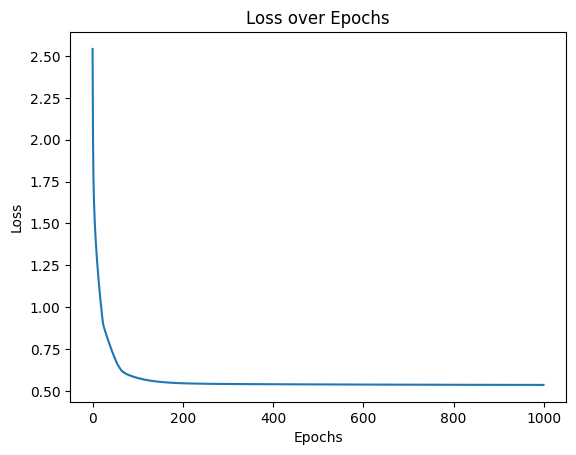

In [21]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()